In [62]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
data = load_breast_cancer(return_X_y=False, as_frame=True)
data = data["frame"]

In [32]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
data.loc[data["target"] == 0, "target"] = "malignant"
data.loc[data["target"] == 1, "target"] = "benign"

In [39]:
numeric_columns = data.select_dtypes(include=[np.number])

In [43]:
numeric_columns.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

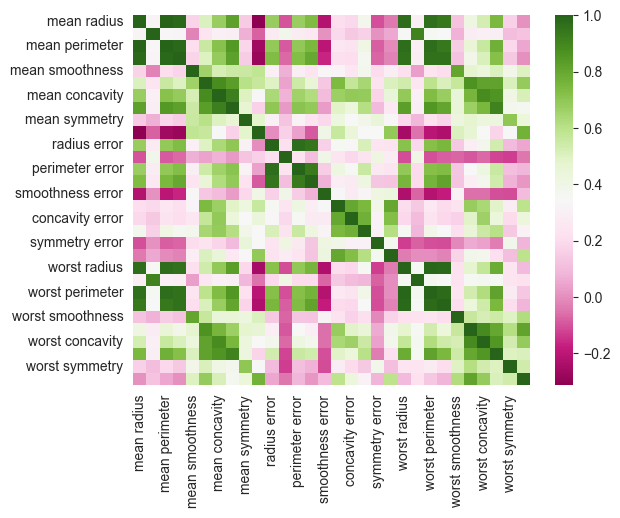

In [40]:
sns.heatmap(numeric_columns.corr(), cmap="PiYG")

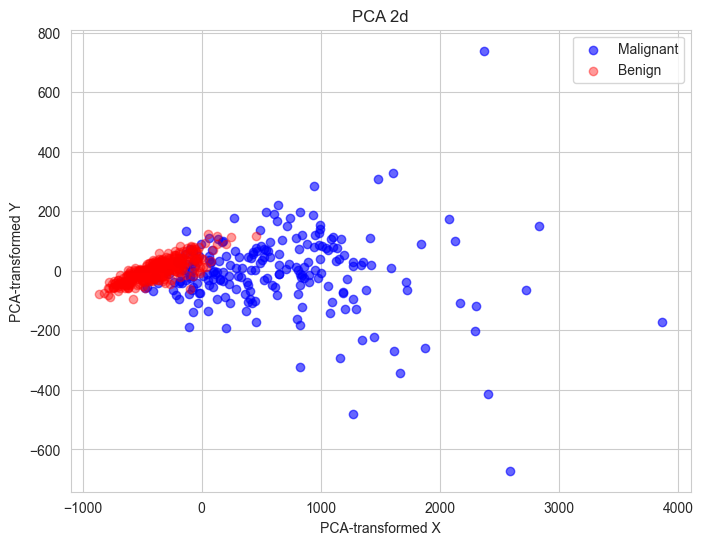

In [102]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(numeric_columns)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[data["target"] == "malignant", 0], data_pca[data["target"] == "malignant", 1], color="blue", label="Malignant", alpha=0.6)
plt.scatter(data_pca[data["target"] == "benign", 0], data_pca[data["target"] == "benign", 1], color="red", label="Benign", alpha=0.4)
plt.title("PCA 2d")
plt.xlabel("PCA-transformed X")
plt.ylabel("PCA-transformed Y")
plt.legend()
plt.show()

In [342]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

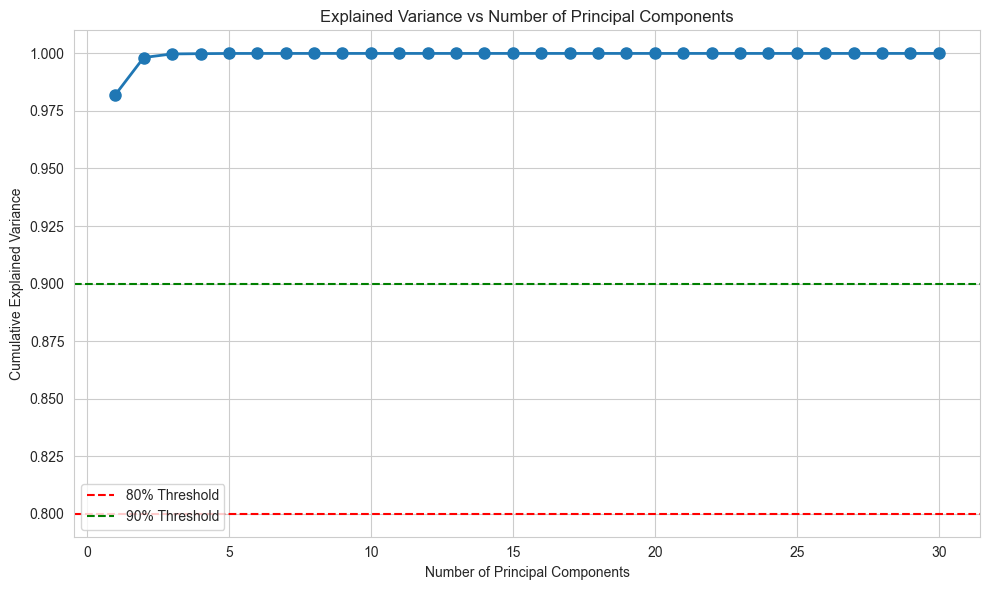

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "o-", linewidth=2, markersize=8)
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Principal Components")
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(data_scaled, data["target"])

important_features_mask = rfe.support_
data_important = data_scaled[:, important_features_mask]
data_less_important = data_scaled[:, ~important_features_mask]

pca_important = PCA()
data_pca_important = pca_important.fit_transform(data_important)
explained_variance_important = pca_important.explained_variance_ratio_
cumulative_variance_important = np.cumsum(explained_variance_important)

pca_less_important = PCA()
data_pca_less_important = pca_less_important.fit_transform(data_less_important)
explained_variance_less_important = pca_less_important.explained_variance_ratio_
cumulative_variance_less_important = np.cumsum(explained_variance_less_important)

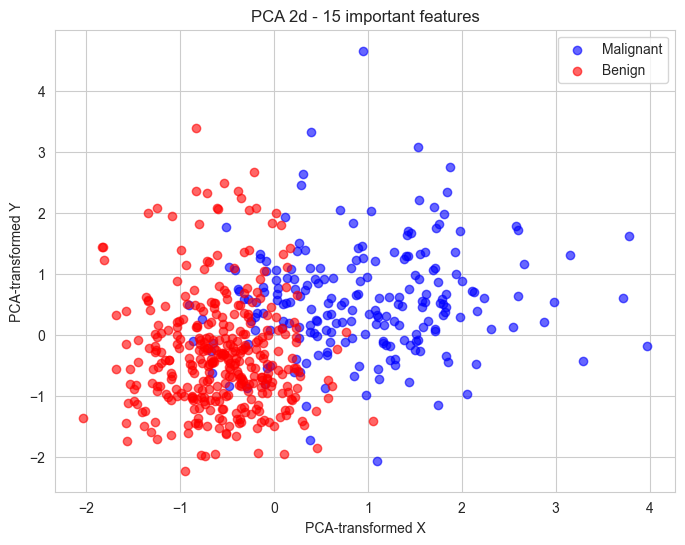

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(data_important[data["target"] == "malignant", 0], data_important[data["target"] == "malignant", 1], color="blue", label="Malignant", alpha=0.6)
plt.scatter(data_important[data["target"] == "benign", 0], data_important[data["target"] == "benign", 1], color="red", label="Benign", alpha=0.6)
plt.title("PCA 2d - 15 important features")
plt.xlabel("PCA-transformed X")
plt.ylabel("PCA-transformed Y")
plt.legend()
plt.show()

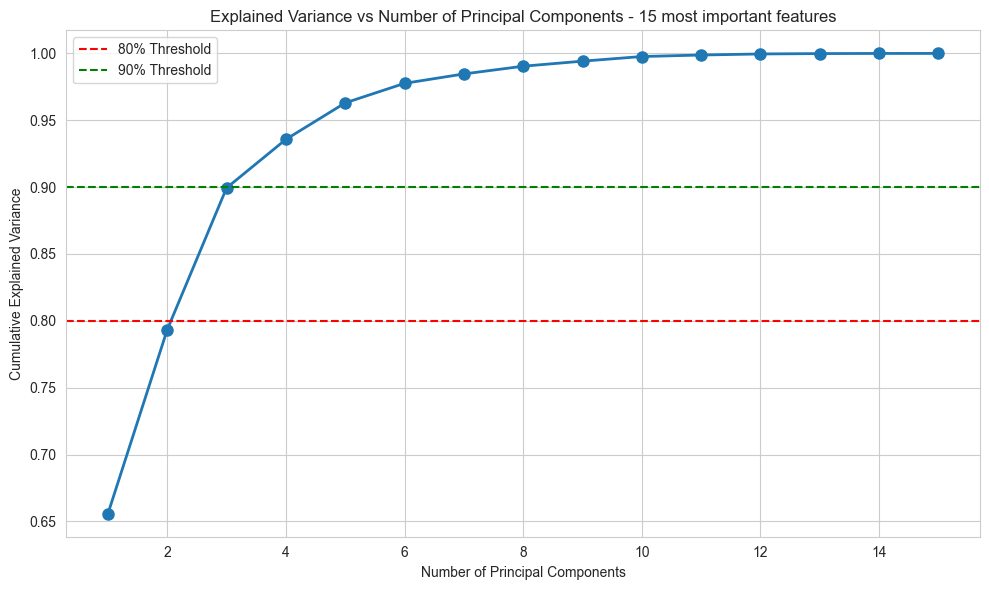

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_important) + 1), cumulative_variance_important, "o-", linewidth=2, markersize=8)
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Principal Components - 15 most important features")
plt.legend()
plt.tight_layout()
plt.show()

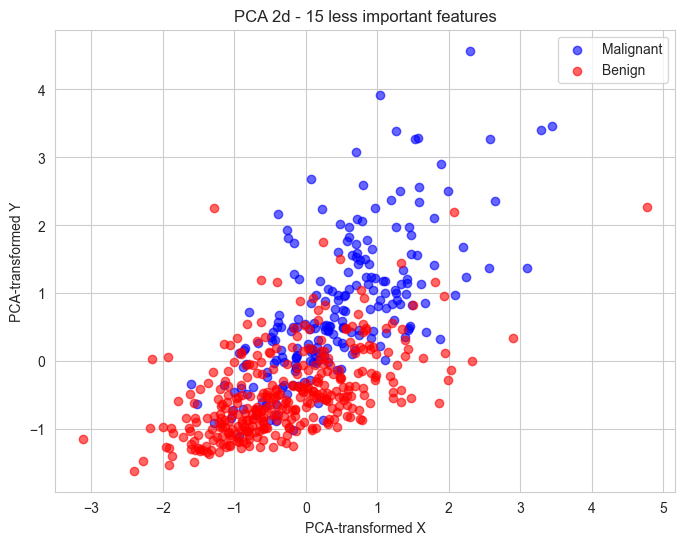

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(data_less_important[data["target"] == "malignant", 0], data_less_important[data["target"] == "malignant", 1], color="blue", label="Malignant", alpha=0.6)
plt.scatter(data_less_important[data["target"] == "benign", 0], data_less_important[data["target"] == "benign", 1], color="red", label="Benign", alpha=0.6)
plt.title("PCA 2d - 15 less important features")
plt.xlabel("PCA-transformed X")
plt.ylabel("PCA-transformed Y")
plt.legend()
plt.show()

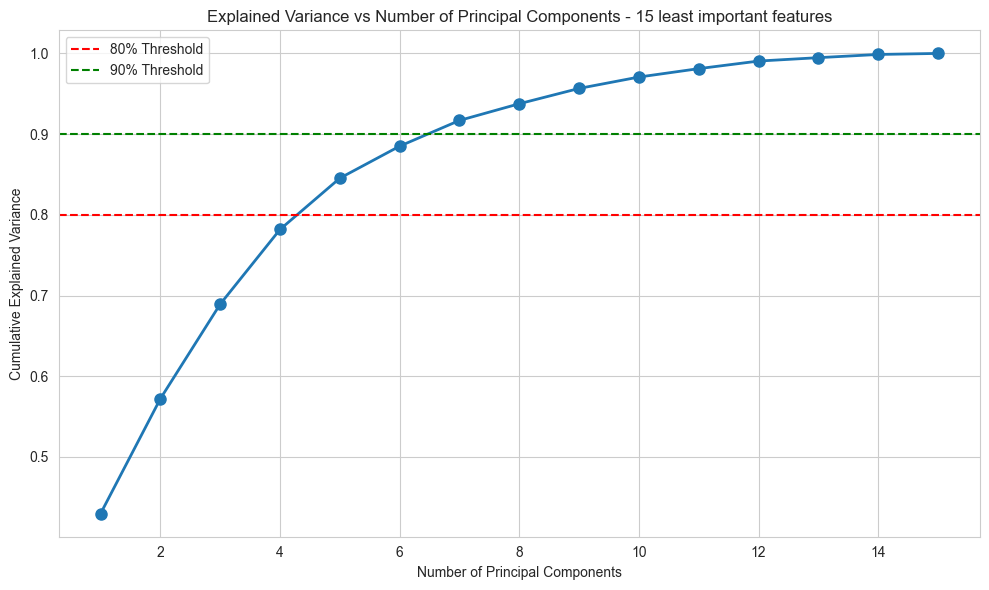

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_less_important) + 1), cumulative_variance_less_important, "o-", linewidth=2, markersize=8)
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Principal Components - 15 least important features")
plt.legend()
plt.tight_layout()
plt.show()

Reducing the number of features made it harder for PCA. When all 30 features were used, even one principal part was enough to get explained variance above 90%. Using 15 top features is still OK. 2d plot is comparable to the PCA plot with all features. Using 15 worst features was a bad idea. The Final plot does not distinguish a type of cancer very well.

In [239]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.00001)
data_kpca = kpca.fit_transform(numeric_columns)

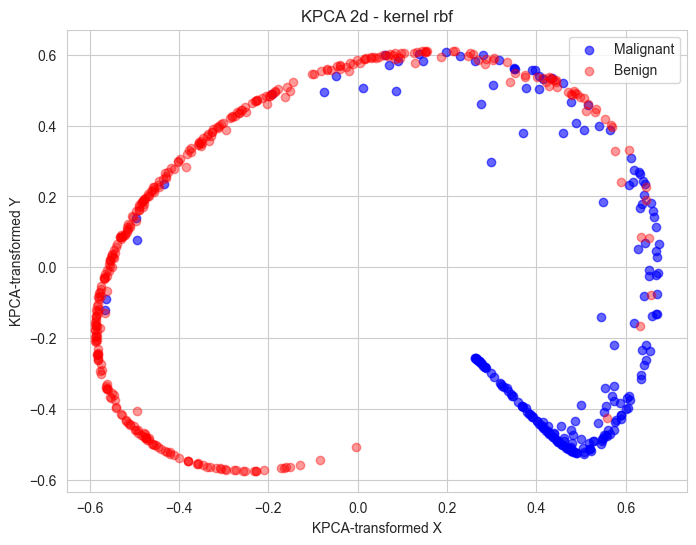

In [240]:
plt.figure(figsize=(8, 6))
plt.scatter(data_kpca[data["target"] == "malignant", 0], data_kpca[data["target"] == "malignant", 1], color="blue", label="Malignant", alpha=0.6)
plt.scatter(data_kpca[data["target"] == "benign", 0], data_kpca[data["target"] == "benign", 1], color="red", label="Benign", alpha=0.4)
plt.title("KPCA 2d - kernel rbf")
plt.xlabel("KPCA-transformed X")
plt.ylabel("KPCA-transformed Y")
plt.legend()
plt.show()

In [261]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 
df_iris = pd.read_csv(iris_url, names=['sepal length','sepal width','petal length','petal width','target'])

features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df_iris.loc[:, features_iris].values
 
y_iris = df_iris.loc[:,['target']].values
x_iris = StandardScaler().fit_transform(x_iris)

In [276]:
kpca_irys = KernelPCA(n_components=2, kernel="rbf", gamma=1)
irys_data_kpca = kpca.fit_transform(x_iris)

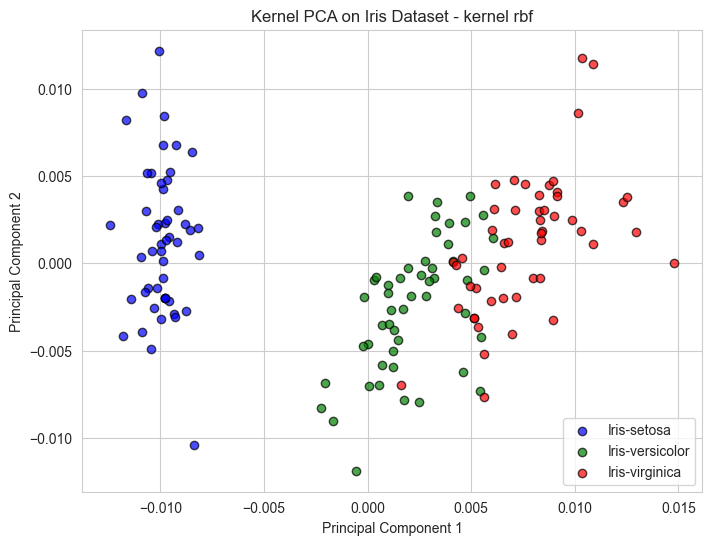

In [277]:
plt.figure(figsize=(8, 6))

plt.scatter(irys_data_kpca[y_iris.ravel() == "Iris-setosa", 0], 
            irys_data_kpca[y_iris.ravel() == "Iris-setosa", 1], 
            color="blue", label="Iris-setosa", edgecolors="k", alpha=0.7)

plt.scatter(irys_data_kpca[y_iris.ravel() == "Iris-versicolor", 0], 
            irys_data_kpca[y_iris.ravel() == "Iris-versicolor", 1], 
            color="green", label="Iris-versicolor", edgecolors="k", alpha=0.7)

plt.scatter(irys_data_kpca[y_iris.ravel() == "Iris-virginica", 0], 
            irys_data_kpca[y_iris.ravel() == "Iris-virginica", 1], 
            color="red", label="Iris-virginica", edgecolors="k", alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Kernel PCA on Iris Dataset - kernel rbf")
plt.legend()
plt.show()

In [321]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int) 

X_scaled = scaler.fit_transform(X)

In [322]:
pca_mnist = PCA(n_components=0.99)
X_pca = pca_mnist.fit_transform(X_scaled)

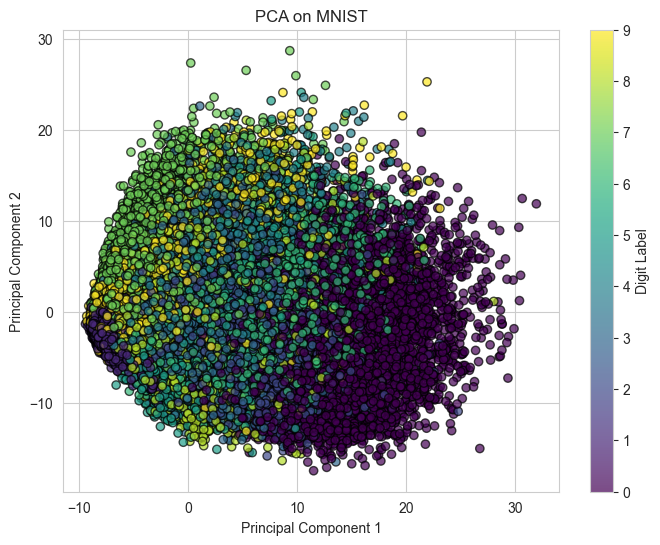

In [318]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolors="k", alpha=0.7)
plt.title("PCA on MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Digit Label")
plt.show()

In [323]:
explained_variance_mnist = pca_mnist.explained_variance_ratio_
cumulative_variance_mnist = np.cumsum(explained_variance_mnist)

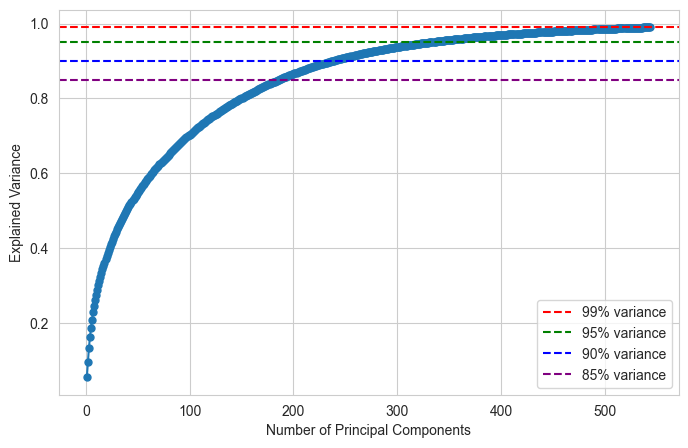

In [341]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_mnist) + 1), cumulative_variance_mnist, marker="o", markersize=5)
plt.axhline(y=0.99, color="r", linestyle="--", label="99% variance")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% variance")
plt.axhline(y=0.90, color="b", linestyle="--", label="90% variance")
plt.axhline(y=0.85, color="purple", linestyle="--", label="85% variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.legend()
plt.show()

In [325]:
components_needed = [np.argmax(cumulative_variance_mnist >= x) + 1 for x in [0.99, 0.95, 0.90, 0.85]]
print(f"Components needed for 99% variance: {components_needed[0]}")
print(f"Components needed for 95% variance: {components_needed[1]}")
print(f"Components needed for 90% variance: {components_needed[2]}")
print(f"Components needed for 85% variance: {components_needed[3]}")

Components needed for 99% variance: 544
Components needed for 95% variance: 332
Components needed for 90% variance: 238
Components needed for 85% variance: 186


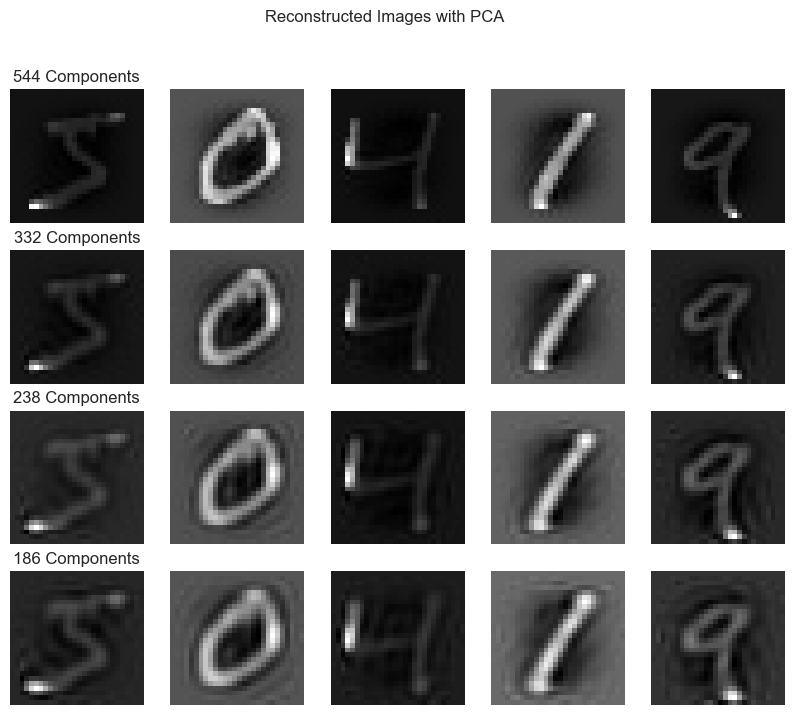

In [326]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for row, comp in enumerate(components_needed):
    pca = PCA(n_components=comp)
    X_reduced = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_reduced)
    
    for col in range(5):
        axes[row, col].imshow(X_reconstructed[col].reshape(28, 28), cmap="gray")
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(f"{comp} Components", fontsize=12)
plt.suptitle("Reconstructed Images with PCA")
plt.show()

In [327]:
n_samples = 5000
random_indices = np.random.choice(X_scaled.shape[0], n_samples, replace=False)
X_subset = X_scaled[random_indices]
y_subset = y[random_indices]

In [328]:
kpca_mnist = KernelPCA(n_components=components_needed[1], kernel="rbf", gamma=0.01, fit_inverse_transform=True)
X_kpca = kpca_mnist.fit_transform(X_subset)
X_reconstructed_kpca = kpca_mnist.inverse_transform(X_kpca)

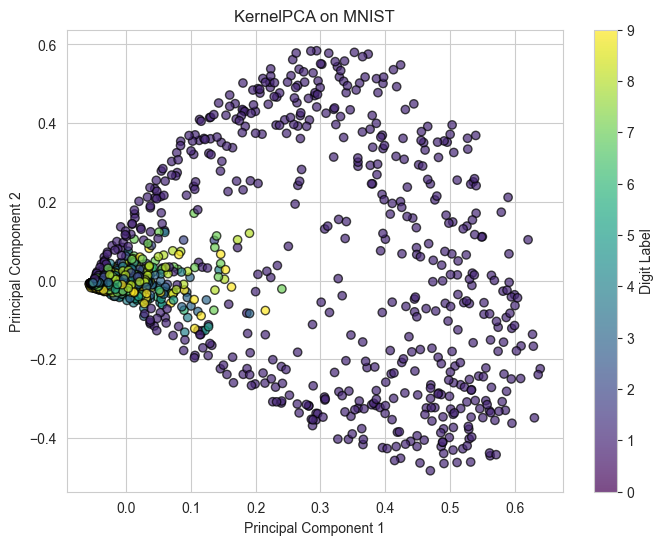

In [332]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_subset, cmap="viridis", edgecolors="k", alpha=0.7)
plt.title("KernelPCA on MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Digit Label")

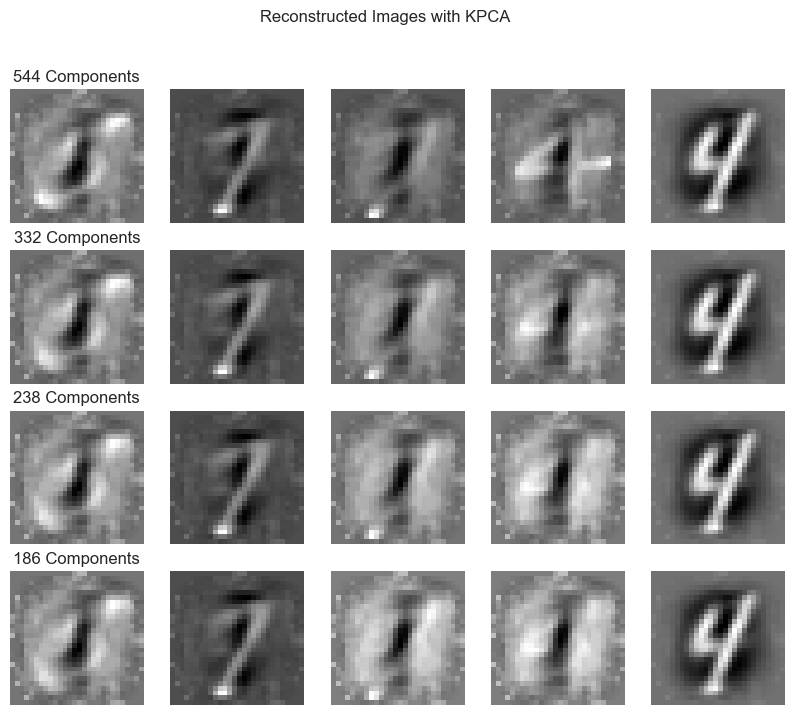

In [333]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for row, comp in enumerate(components_needed):
    kpca_mnist = KernelPCA(n_components=comp, kernel="rbf", gamma=0.01, fit_inverse_transform=True)
    X_kpca = kpca_mnist.fit_transform(X_subset)
    X_reconstructed_kpca = kpca_mnist.inverse_transform(X_kpca)
    
    for col in range(5):
        axes[row, col].imshow(X_reconstructed_kpca[col].reshape(28, 28), cmap="gray")
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(f"{comp} Components", fontsize=12)
plt.suptitle("Reconstructed Images with KPCA")
plt.show()

In my case, I found that I worked better with regular PCA. I was able to achieve satisfactory results almost immediately. With Kernel PCA, I had to experiment with different kernels and their hyperparameters. I feel that I could not achieve better results than with regular PCA, which is surprising because, based on what I know, KPCA should perform better.

These algorithms are excellent for quickly analyzing a dataset and understanding the similarities between different classes. This is especially clear with the iris dataset, where it's easy to identify which classes the trained model is most likely to confuse.

The computational complexity for PCA was similar across all the datasets I tested. Even with the full MNIST dataset, PCA performed very quickly. However, KPCA required reducing the dataset size.

KPCA performed much worse in reconstructing MNIST images. I think the issue was the smaller dataset in this case. When analyzing breast cancer data with reduced number of features, PCA also started to perform slightly worse.

When testing data normalization for KPCA, the results were not always better. Often, outliers appeared that severely affected the visibility of the plot. I didn’t want to remove the outliers, as I didn’t want to lose any potentially valuable information.